In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tweet_df = pd.read_csv('Tweets/ExtractedTweets.csv')

In [4]:
print(len(tweet_df))
tweet_df.head()

86460


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


Text(0.5, 1.0, 'Class Counts')

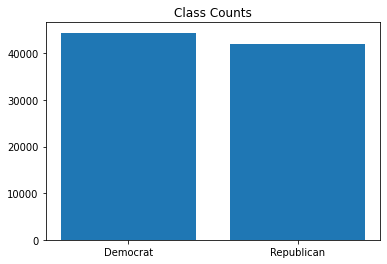

In [5]:
parties = tweet_df.Party.unique()
plt.bar(parties, tweet_df.Party.value_counts().values)
plt.title('Class Counts')

In [6]:
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
test = tweet_df.iloc[1].Tweet
# print(test)
# print(len(test))


def preprocess_tweet(tweet): 
    reg_token = RegexpTokenizer("([a-zA-Z&]+(?:'[a-z]+)?)")
    word_stem = PorterStemmer()
    word_lem = WordNetLemmatizer()
    new_tweet = ' '.join([i for i in tweet.lower().split() if i != 'rt' and i.endswith('…') == False])
    new_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",new_tweet.lower()).split())
    new_tweet = reg_token.tokenize(new_tweet.lower())
    
#     new_tweet= ' '.join([word_lem.lemmatize(i) for i in new_tweet])
#     new_tweet= ' '.join([word_stem.stem(i) for i in new_tweet if len(i) > 1])

#     print(f'{tweet}\n')
#     print(f'{new_tweet}\n')
#     print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
#     return new_tweet
    
    return ' '.join(new_tweet)
    

tweet_df['NewTweet'] = tweet_df.Tweet.map(preprocess_tweet)

In [10]:
tweet_df.head()

,Party,Handle,Tweet,NewTweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote to savetheinternet prou...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,winter haven resident alta vista teacher is on...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,noted that hurricane maria has left approximat...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,meeting with thanks for taking the time to mee...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,hurricane season starts on june st puerto rico...
